<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Olympic_flag.svg/2560px-Olympic_flag.svg.png"
    style="width:250px; float: right; margin: 0 40px 40px 40px;"></img>
# Olympic Data Analysis

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Loading the dataset

Dataset link : https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

In [2]:
athletes = pd.read_csv("athlete_events.csv")
regions = pd.read_csv("noc_regions.csv")

In [3]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
athletes_df = athletes.merge(regions, how = "left", on = "NOC")
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [6]:
athletes_df.shape

(271116, 17)

In [7]:
athletes_df.rename(columns = {"region" : "Region",
                              "notes" : "Notes"}, inplace = True)

In [8]:
athletes_df.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN


In [9]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [10]:
athletes_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [11]:
# checking null

nan_values = athletes_df.isna()
nan_columns = nan_values.any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [12]:
# percentage of the null values present in their respective rows

(athletes_df.isnull().sum().sort_values(ascending = False).head(7) / athletes_df.size) * 100

Notes     5.773023
Medal     5.019189
Weight    1.364187
Height    1.305519
Age       0.205556
Region    0.008028
Season    0.000000
dtype: float64

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Viewing India's Data

In [13]:
athletes_df.query('Team == "India"' ).head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [14]:
athletes_df.query('Team == "India"' ).shape

(1400, 17)

In [15]:
athletes_df.query('Team == "India" & Year == 2008 & Medal == "Gold"')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
22004,11601,Abhinav Bindra,M,25.0,173.0,70.0,India,IND,2008 Summer,2008,Summer,Beijing,Shooting,"Shooting Men's Air Rifle, 10 metres",Gold,India,NaN


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Top countries participating

In [16]:
top_10_countries = athletes_df.Team.value_counts().sort_values(ascending = False).head(10)

In [17]:
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

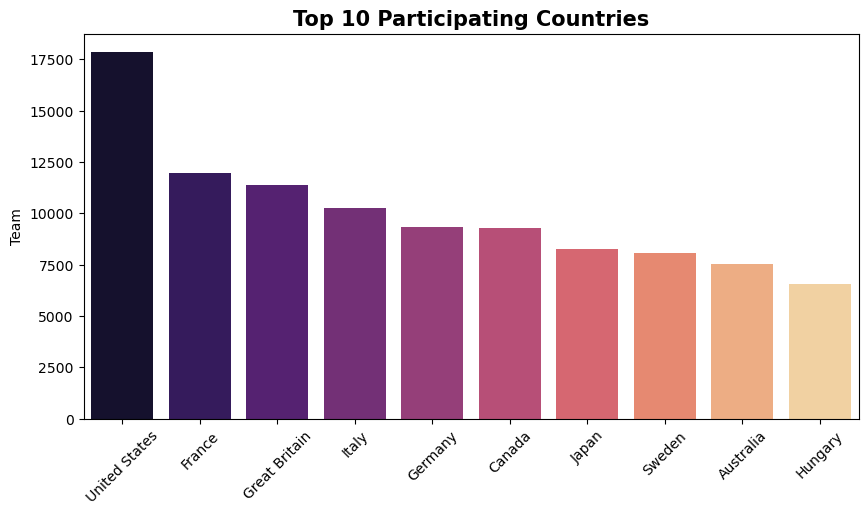

In [18]:
plt.figure(figsize = (10,5))
plt.title("Top 10 Participating Countries", fontsize = 15, weight = "bold")
sns.barplot(x = top_10_countries.index, y = top_10_countries, palette = "magma")
plt.xticks(rotation = 45)
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Age distribution of athletes

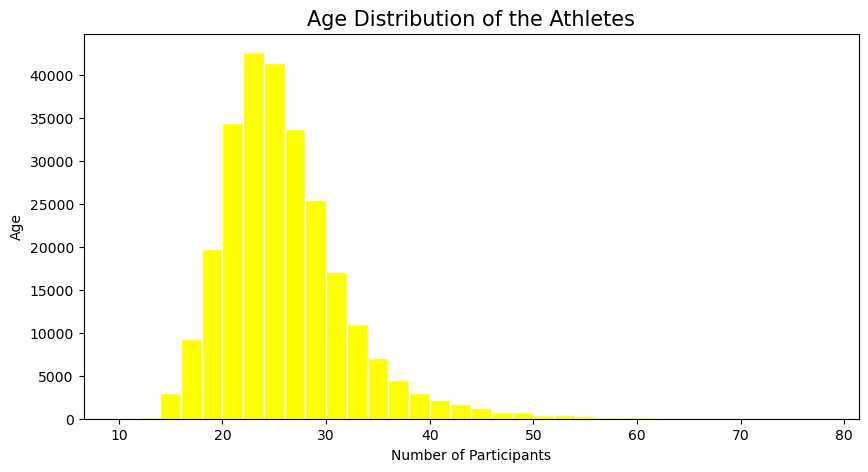

In [19]:
plt.figure(figsize = (10,5))
plt.title("Age Distribution of the Athletes", fontsize = 15)
plt.xlabel("Number of Participants")
plt.ylabel("Age")
plt.hist(athletes_df.Age, bins = np.arange(10,80,2), color = "yellow", edgecolor = "white")
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## What are the sports played in Winter and Summer Olympics upto now?

In [20]:
winter_sports = athletes_df[athletes_df.Season == "Winter"].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [21]:
summer_sports = athletes_df[athletes_df.Season == "Summer"].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Gender distribution of the athletes

In [22]:
gender_count = athletes_df.Sex.value_counts()
gender_count

M    196594
F     74522
Name: Sex, dtype: int64

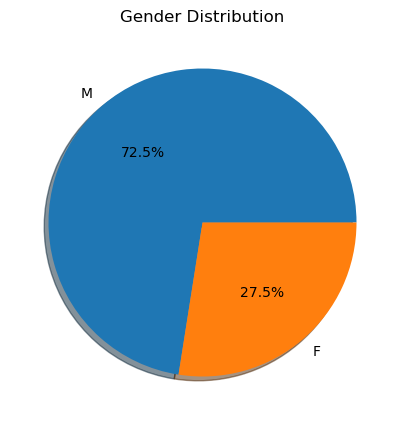

In [23]:
plt.figure(figsize = (8,5))
plt.title("Gender Distribution")
plt.pie(gender_count, labels = gender_count.index, autopct = "%1.1f%%", shadow = True)
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Total Medals Won

In [24]:
athletes_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Total Female Athletes in each Olympic

In [25]:
female_participants = athletes_df[(athletes_df.Sex == "F") & (athletes_df.Season == "Summer")][["Sex","Year"]]
female_participants = female_participants.groupby("Year").count().reset_index()
female_participants.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


In [26]:
women_olympics = athletes_df[(athletes_df.Sex == "F") & (athletes_df.Season == "Summer")]

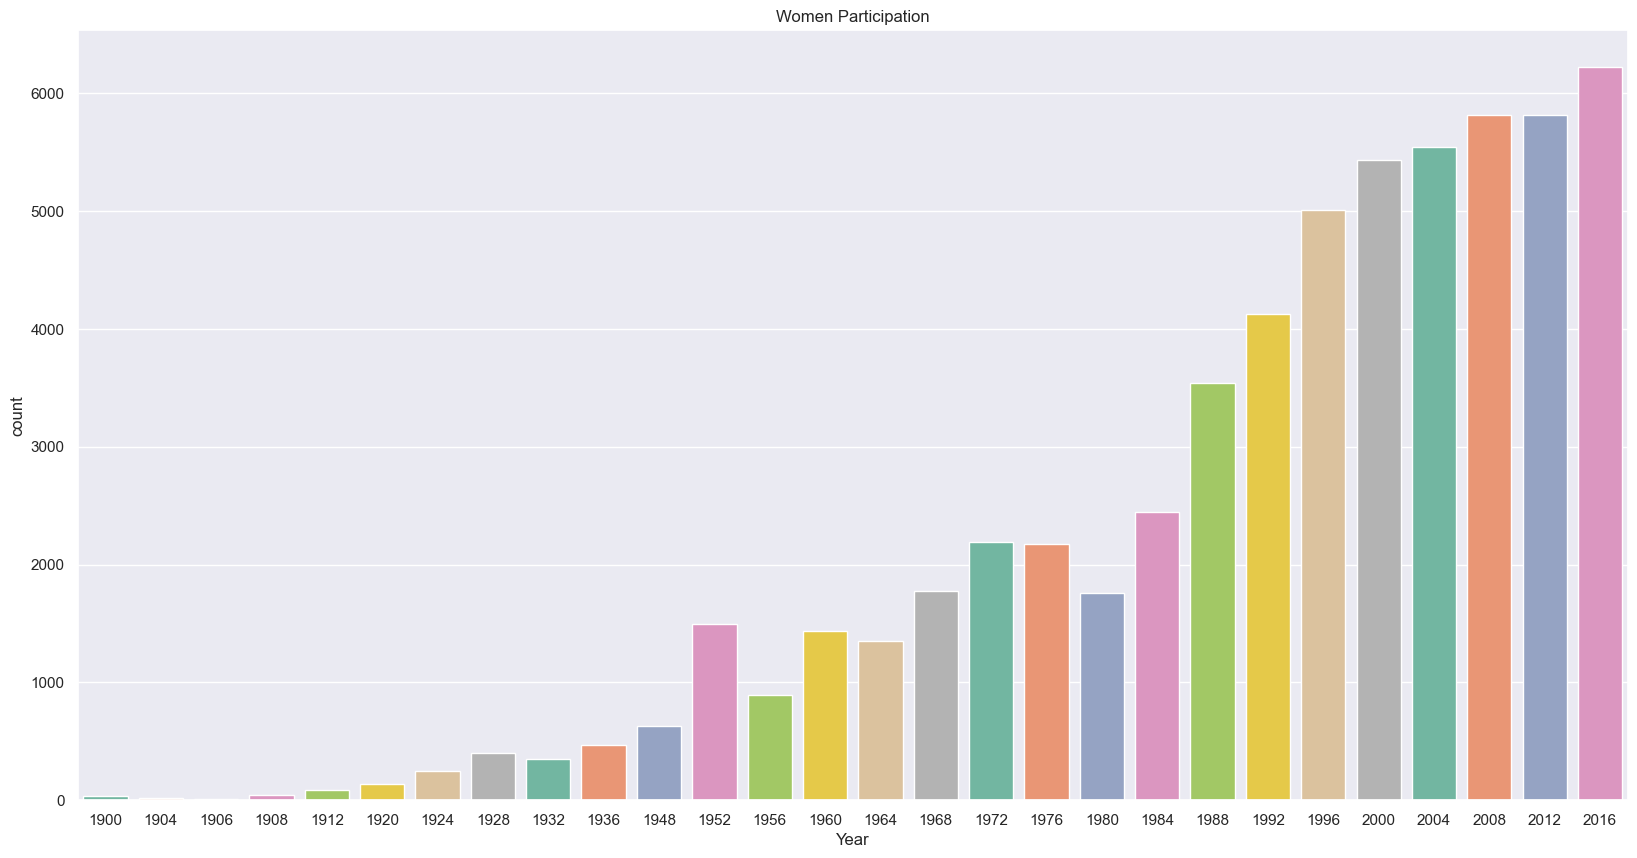

In [27]:
sns.set(style = "darkgrid")
plt.figure(figsize = (20,10))
sns.countplot(x = "Year", data = women_olympics, palette = "Set2")
plt.title("Women Participation")
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Total Male Athletes in each Olympic

In [28]:
male_participants = athletes_df[(athletes_df.Sex == "M") & (athletes_df.Season == "Summer")][["Sex","Year"]]
male_participants = male_participants.groupby("Year").count().reset_index()
male_participants.tail()

,Year,Sex
24,2000,8390
25,2004,7897
26,2008,7786
27,2012,7105
28,2016,7465


In [29]:
men_olympics = athletes_df[(athletes_df.Sex == "M") & (athletes_df.Season == "Summer")]

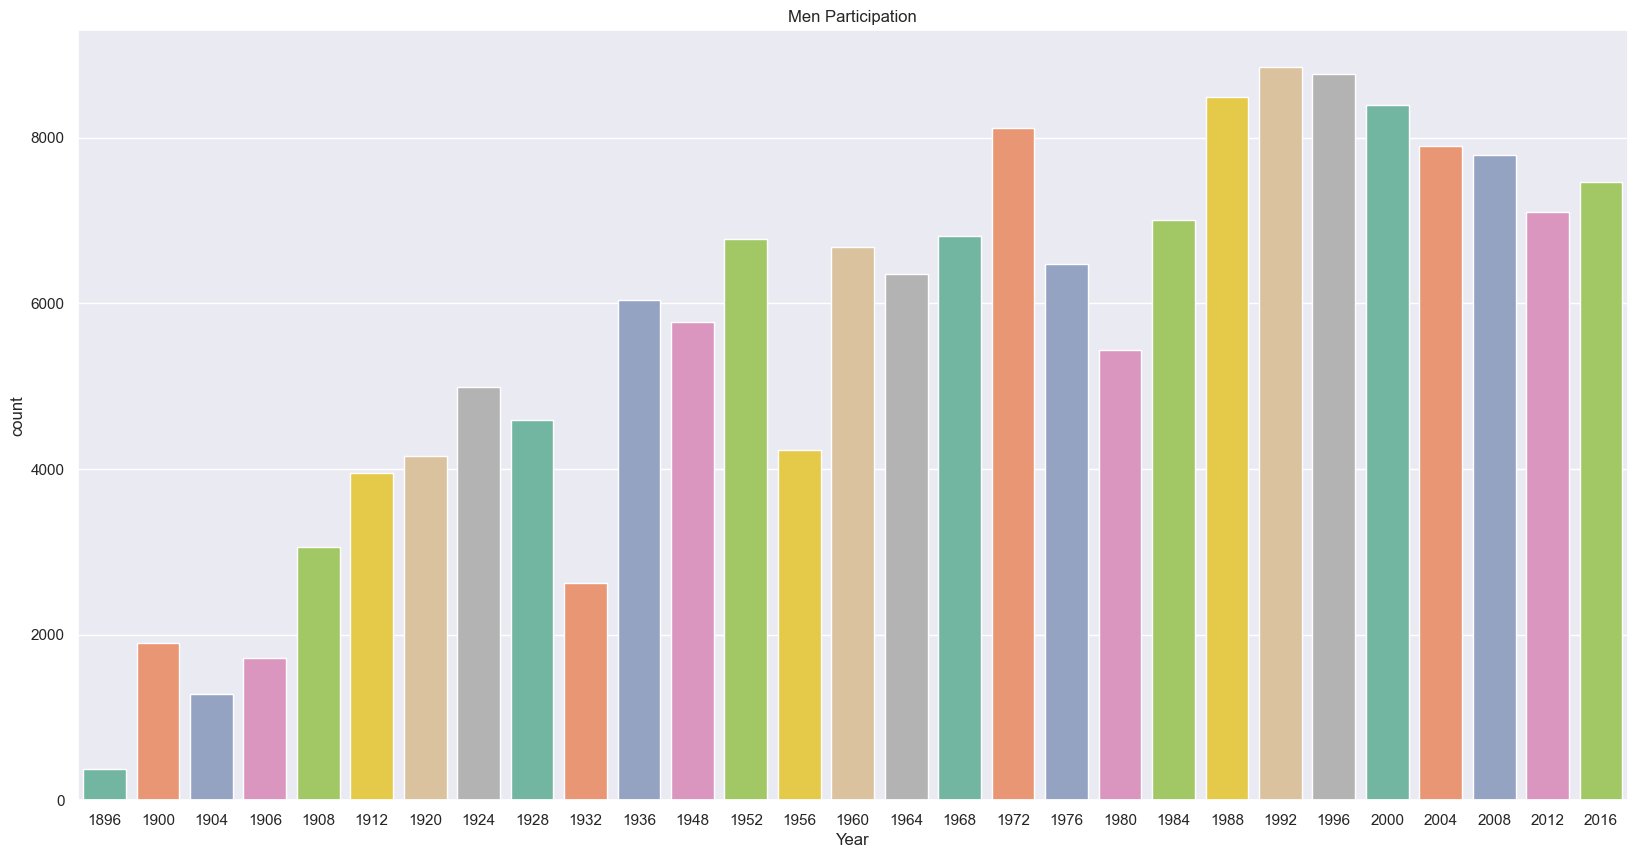

In [30]:
sns.set(style = "darkgrid")
plt.figure(figsize = (20,10))
sns.countplot(x = "Year", data = men_olympics, palette = "Set2")
plt.title("Men Participation")
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

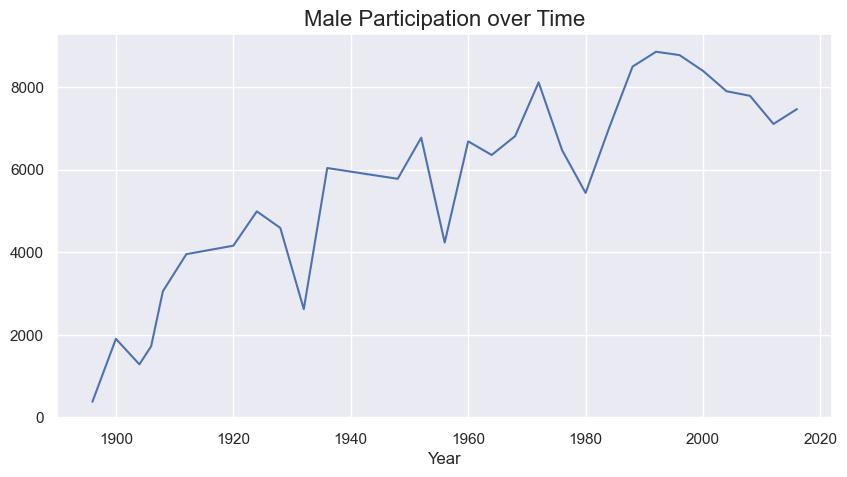

In [31]:
part = men_olympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(10,5))
part.loc[:,'M'].plot()
plt.title("Male Participation over Time", size = 16)
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

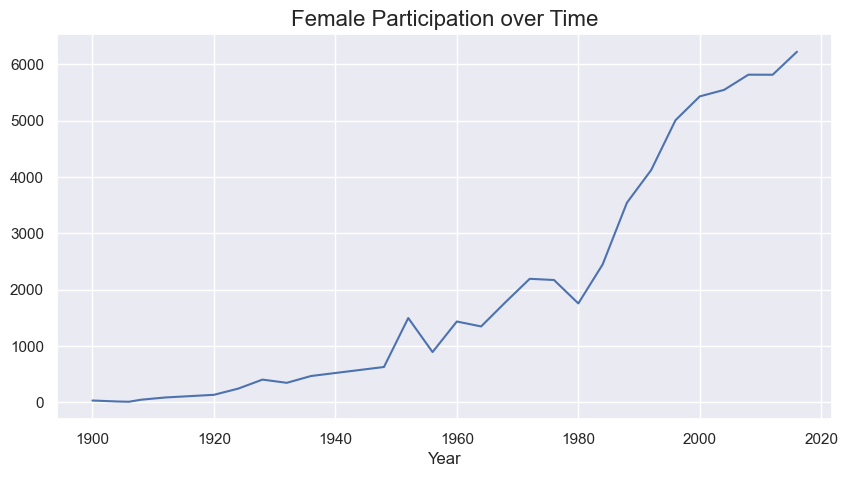

In [32]:
part = women_olympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(10,5))
part.loc[:,'F'].plot()
plt.title("Female Participation over Time", size = 16)
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Athletes with Gold Medal

In [33]:
goldMedal = athletes_df[(athletes_df.Medal == 'Gold')]
goldMedal.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [34]:
# taking only those who are different from NaN

goldMedal = goldMedal[np.isfinite(goldMedal['Age'])]

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Gold medal winners who are above 60 years of age

In [35]:
goldMedal['Name'][goldMedal['Age'] > 60]

104003                       Isaac Lazarus Israls
105199                            Charles Jacobus
190952    Lida Peyton "Eliza" Pollock (McMillen-)
226374               Galen Carter "G. C." Spencer
233390                          Oscar Gomer Swahn
261102                    Robert W. Williams, Jr.
Name: Name, dtype: object

In [36]:
sporting_event = goldMedal['Sport'][goldMedal['Age'] > 60]
sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

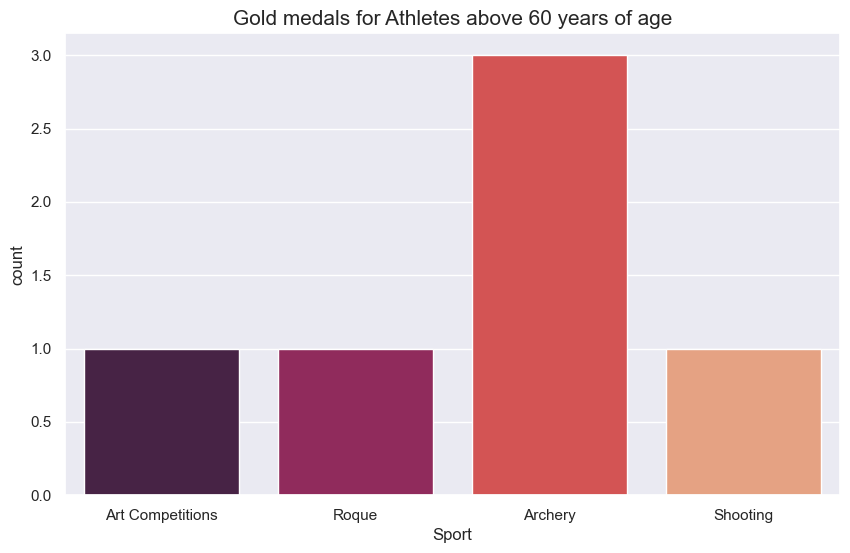

In [37]:
plt.figure(figsize = (10,6))
plt.tight_layout()
ax = sns.countplot(x = sporting_event.index, data = sporting_event, palette = "rocket")
plt.title('Gold medals for Athletes above 60 years of age', size = 15)
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Gold medal distribution country wise

In [38]:
goldMedal.Region.value_counts().reset_index(name = 'Medals').head(10)

,index,Medals
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567
5,France,491
6,Sweden,479
7,Canada,461
8,Hungary,432
9,Norway,378


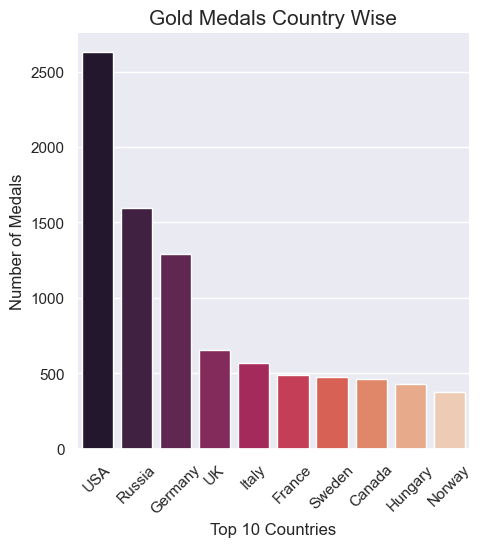

In [39]:
totalGoldmedals = goldMedal.Region.value_counts().reset_index(name = 'Medals').head(10)
g = sns.catplot(x = "index", y = "Medals", data = totalGoldmedals, height=5, kind="bar", palette='rocket')
g.despine(left = True)
g.set_xlabels("Top 10 Countries")
g.set_ylabels("Number of Medals")
plt.title("Gold Medals Country Wise", size = 15)
plt.xticks(rotation = 45)
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Rio Olympics 2016

In [40]:
most_recent = athletes_df.Year.max()
most_recent

2016

In [41]:
# Top Gold winning nations in Rio Olympics

team_names = athletes_df[(athletes_df.Year == most_recent) & (athletes_df.Medal == 'Gold')].Team
team_names.value_counts().head(10)

United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

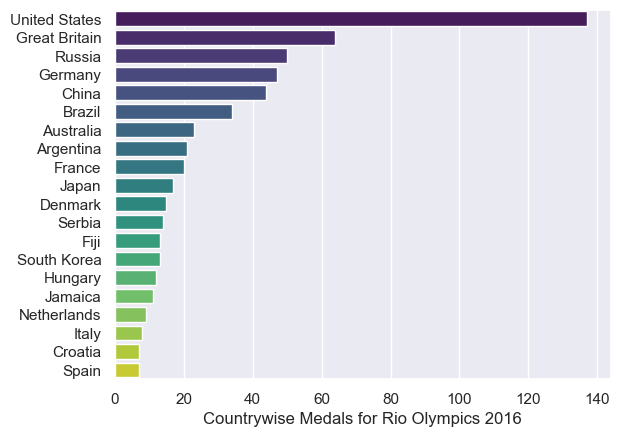

In [42]:
sns.barplot(x=team_names.value_counts().head(20), y= team_names.value_counts().head(20).index, palette = "viridis")
plt.ylabel(None)
plt.xlabel('Countrywise Medals for Rio Olympics 2016')
plt.show()

In [43]:
# filtering athletes who had won a medal, we are filtering the null elements

not_null_medals = athletes_df[(athletes_df['Height'].notnull()) & (athletes_df['Weight'].notnull())]

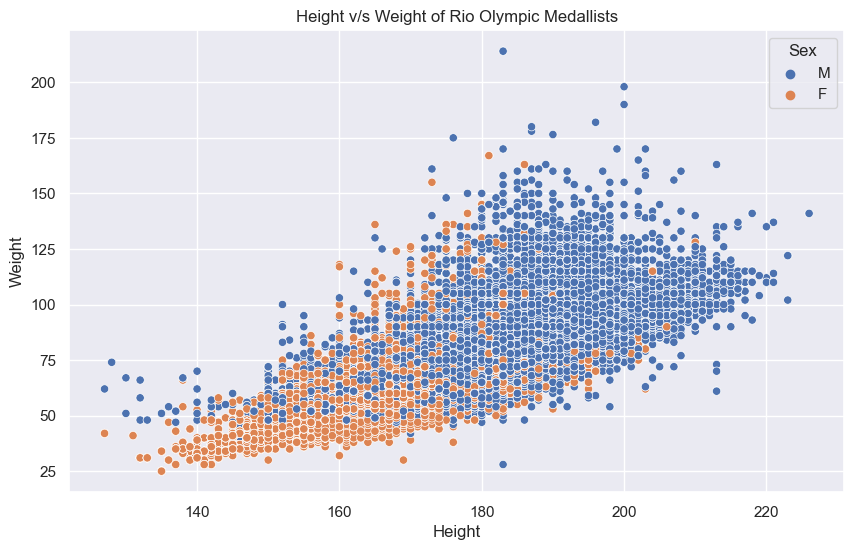

In [44]:
plt.figure(figsize=(10,6))
plt.title("Height v/s Weight of Rio Olympic Medallists")
axis = sns.scatterplot(x= "Height", y = "Weight", data = not_null_medals, hue = "Sex")
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<Figure size 500x1000 with 0 Axes>

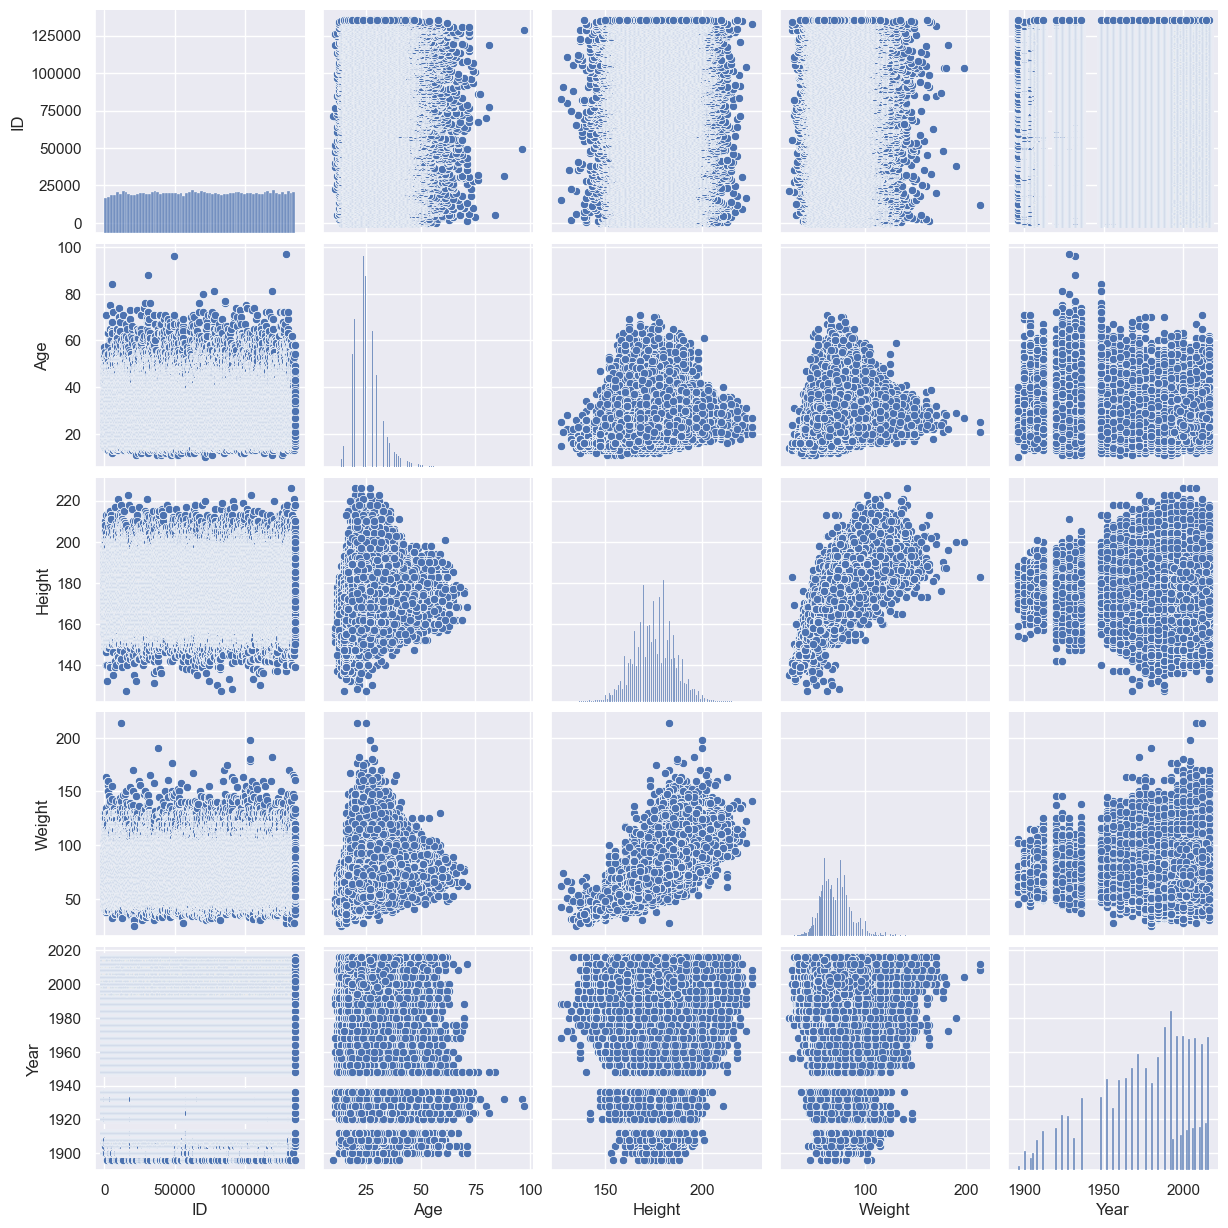

In [45]:
plt.figure(figsize = (5,10))
sns.pairplot(athletes_df)
plt.show()

 ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)